<a href="https://colab.research.google.com/github/sonali6062/Machine_learning_fundamentals/blob/main/AdaBoost_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Implementation of **AdaBoost** using **sklearn** library

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

In [3]:
np.random.seed(42)#we're fixing seed because for each iteration we want same data points
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

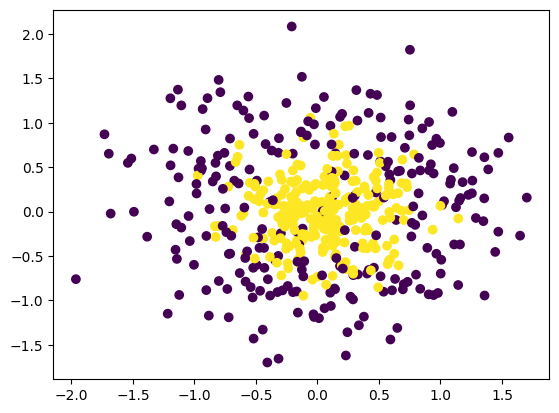

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
model=AdaBoostClassifier()
np.mean(cross_val_score(model,x,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [6]:
model.fit(x,y)

AdaBoostClassifier()

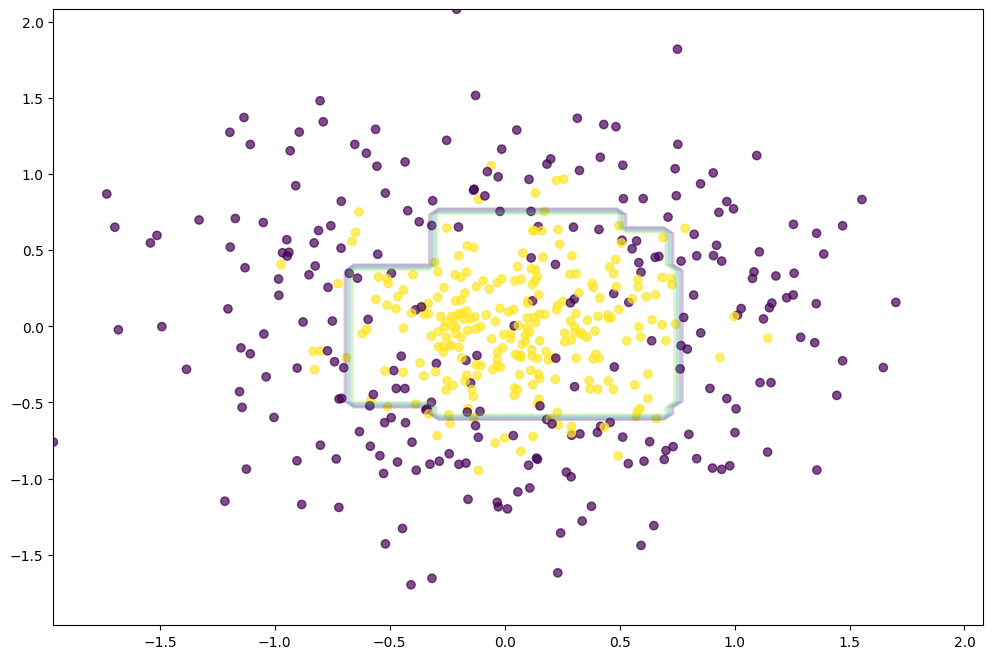

In [7]:
def plot_decision_boundry(clf):
  plt.figure(figsize=(12,8))
  x_range=np.linspace(x.min(),x.max(),100)
  xx1,xx2=np.meshgrid(x_range,x_range)
  y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  y_hat=y_hat.reshape(xx1.shape)
  plt.contour(xx1,xx2,y_hat,alpha=0.2)
  plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)

plot_decision_boundry(model)

In [8]:
model.score(x, y)

0.854

OBSERVATION-there are still many points for which our model is not able to classify properly.

To solve this problem we'll do hyperparameter tuning.

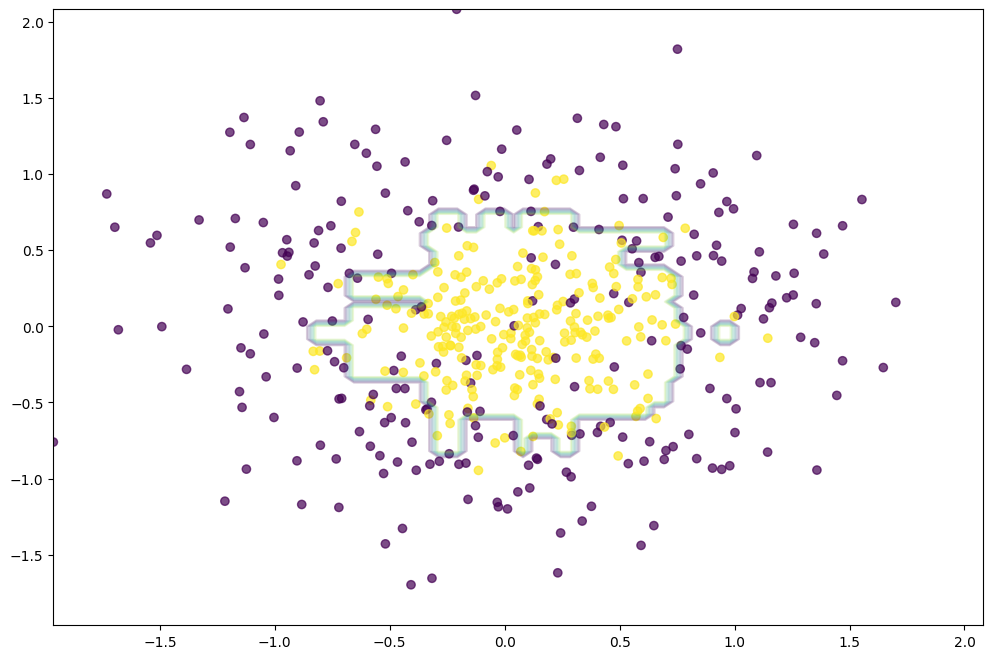

In [9]:
model1=AdaBoostClassifier(n_estimators=2000)
model1.fit(x,y)
plot_decision_boundry(model1)


In [10]:
model1.score(x, y)

0.874

When we're increasing the number of estimators. It results in Overfitting as it is trying to capture smaller DataPoints

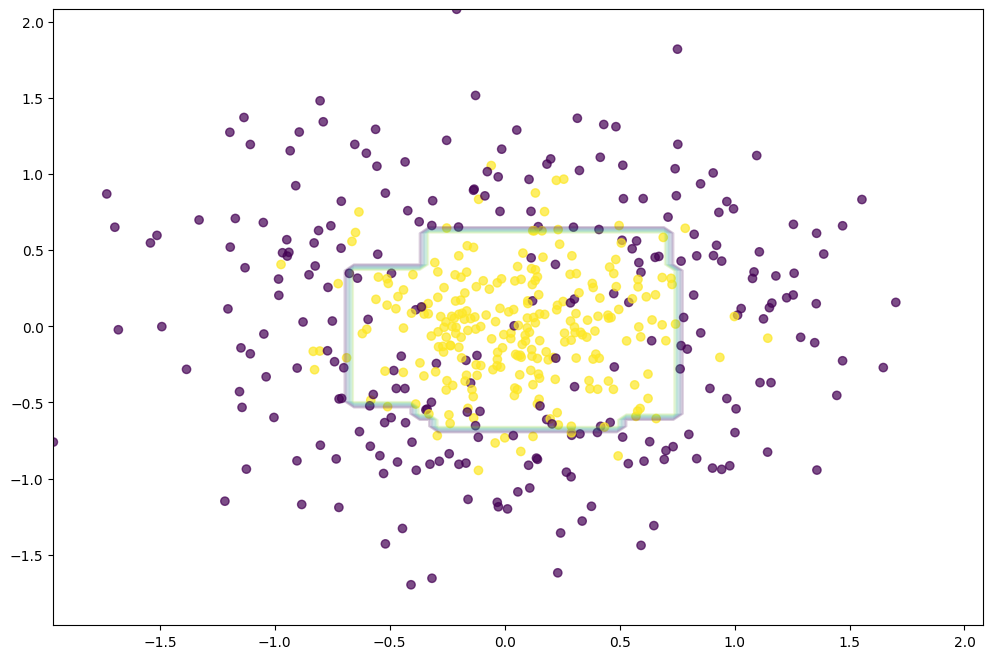

In [11]:
model1=AdaBoostClassifier(n_estimators=2000,learning_rate=0.1)
model1.fit(x,y)
plot_decision_boundry(model1)

In [12]:
model1.score(x, y)

0.852

Less overfitting


# **OPTIMISE THE PARAMETERS IN AdaBoostClassifier: GridSearchCV**

In [13]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10,100,500,1000]
grid['learning_rate']=[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm']=['SAMME']
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
#exicute the grid search
grid_result=grid_search.fit(x,y)
#summarize the best score and configuration
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Best:0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


Optimized model cross-validation accuracy: 0.8320


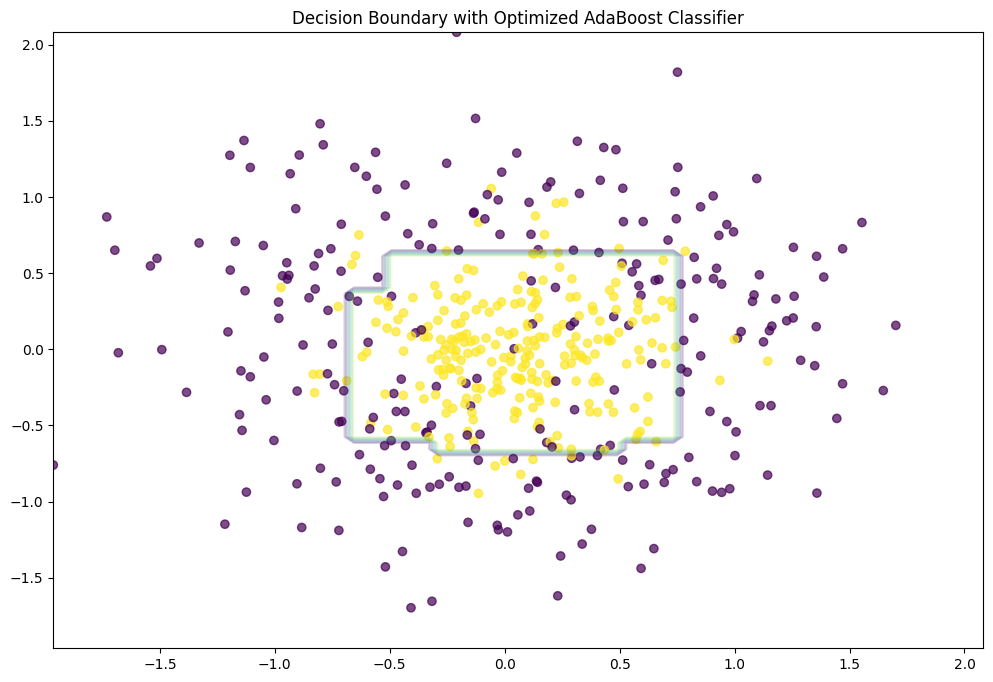

In [14]:
# Get the best parameters from the grid search
best_params = grid_result.best_params_

# Create a new AdaBoost classifier with the best parameters
optimized_model = AdaBoostClassifier(n_estimators=best_params['n_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     # algorithm=best_params['algorithm'] # 'algorithm' parameter is deprecated in recent versions of scikit-learn
                                     random_state=42) # Setting random_state for reproducibility

# Train the optimized model
optimized_model.fit(x, y)

# Evaluate the optimized model using cross-validation
optimized_accuracy = np.mean(cross_val_score(optimized_model, x, y, scoring='accuracy', cv=10))
print(f"Optimized model cross-validation accuracy: {optimized_accuracy:.4f}")

# Plot the decision boundary for the optimized model
plot_decision_boundry(optimized_model)
plt.title("Decision Boundary with Optimized AdaBoost Classifier")
plt.show()

In [15]:
optimized_model.score(x, y)

0.85

Here's a summary of what we did:



* Generated synthetic data using make_circles.
* Visualized the initial data distribution.
* Trained a default AdaBoostClassifier and evaluated its performance using cross-validation.
* Observed the decision boundary of the default model.
* Performed hyperparameter tuning using GridSearchCV to find the optimal n_estimators and learning_rate.
* Trained a new AdaBoostClassifier with the best parameters found by GridSearchCV.
* Evaluated the optimized model's performance using cross-validation and plotted its decision boundary.


This demonstrates how hyperparameter tuning can improve the performance of machine learning models.